In [1]:
import pandas as pd
import geopandas as gpd
# import pycountry
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import plotly.graph_objects as go
from shapely.geometry import Polygon, Linestr, Point
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [68]:
# Data import
country_dict = pd.read_csv('data/Map/country_codes.csv').set_index('Code').to_dict()

ntc_df = pd.read_csv('data/Map/true_WO__1.2_1.0_FromTo_ntc_utilisation.csv')
ntc_df = ntc_df.loc[~(ntc_df.ntc_max == 0)].reset_index(drop=True)
ntc_df['from_zone'] = [country_dict['Name'][x] for x in ntc_df['from_zone']]
ntc_df['to_zone'] = [country_dict['Name'][x] for x in ntc_df['to_zone']]


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

countries = ntc_df.from_zone.unique()
price_data = pd.read_csv('data/Map/true_WO__1.2_1.0_res_mc_grouped_by_zone_year_max.csv').set_index('zone').drop('mc_el_maximum_std', axis=1)
price_dict = price_data.T.to_dict('index')
price_dict = {country_dict['Name'][key]: value for key, value in price_dict['mc_el_maximum_mean'].items()}
gdf = world.loc[world['name'].isin(countries),:].copy()
gdf['value'] = gdf['name'].map(price_dict)

gdf['centeroid'] = gdf.centroid
# correcting centeroids that seem off
gdf.loc[gdf['name'] == 'France', 'centeroid'] = Point(2.35, 46.85)
gdf.loc[gdf['name'] == 'Norway', 'centeroid'] = Point(7.00, 60.00)
gdf.loc[gdf['name'] == 'Sweden', 'centeroid'] = Point(14.50, 60.00)
gdf.loc[gdf['name'] == 'United Kingdom', 'centeroid'] = Point(-1, 52.00)

ntc_df['from_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in ntc_df['from_zone']]
ntc_df['to_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in ntc_df['to_zone']]

# combining from and to values
coun_pairs = [set([ntc_df.loc[x,'from_zone'],ntc_df.loc[x,'to_zone']]) for x in range(len(ntc_df))]
coun_pairs = list(coun_pairs)
revers = list(reversed(coun_pairs))
lis = []
for x in coun_pairs:
    lis.append([coun_pairs.index(x),revers.index(x)])


new_df = pd.DataFrame(columns=ntc_df.columns)
row = 0
for x in lis:
        new_df.loc[row, 'from_zone'] = ntc_df.loc[x[0],'from_zone']
        new_df.loc[row, 'to_zone'] = ntc_df.loc[x[0],'to_zone']
        new_df.loc[row, 'ntc_max'] = (ntc_df.loc[x[0],'ntc_max'] + ntc_df.loc[x[1],'ntc_max'])/2
        new_df.loc[row, '100%_utlis_oneWay_max'] = max(ntc_df.loc[x[0],'utilisation_equal100'], ntc_df.loc[x[1],'utilisation_equal100'])
        row += 1

new_df = new_df.drop_duplicates().reset_index(drop=True)

new_df['from_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in new_df['from_zone']]
new_df['to_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in new_df['to_zone']]
new_df


C:\Users\User\AppData\Local\Temp/ipykernel_17596/510176716.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid


,from_zone,to_zone,ntc_max,avg_sum_year,utilisation_percent,utilisation_equal100,utilisation_bigger90,from_coordinates,to_coordinates,100%_utlis_oneWay_max
0,Switzerland,Austria,1020.0,NaN,NaN,NaN,NaN,127 POINT (8.11830 46.79174) Name: centeroi...,114 POINT (14.07616 47.61395) Name: centero...,0.931507
1,Czechia,Austria,1464.0,NaN,NaN,NaN,NaN,153 POINT (15.33456 49.77525) Name: centero...,114 POINT (14.07616 47.61395) Name: centero...,0.204452
2,Germany,Austria,3420.0,NaN,NaN,NaN,NaN,121 POINT (10.28849 51.13372) Name: centero...,114 POINT (14.07616 47.61395) Name: centero...,0.816895
3,Italy,Austria,2691.0,NaN,NaN,NaN,NaN,141 POINT (12.14079 42.75118) Name: centero...,114 POINT (14.07616 47.61395) Name: centero...,0.007078
4,Germany,Belgium,1020.0,NaN,NaN,NaN,NaN,121 POINT (10.28849 51.13372) Name: centero...,129 POINT (4.58083 50.65244) Name: centeroi...,0.917009
5,France,Belgium,2964.0,NaN,NaN,NaN,NaN,43 POINT (2.35000 46.85000) Name: centeroid...,129 POINT (4.58083 50.65244) Name: centeroi...,0.656735
6,Netherlands,Belgium,2100.0,NaN,NaN,NaN,NaN,130 POINT (5.51222 52.29870) Name: centeroi...,129 POINT (4.58083 50.65244) Name: centeroi...,0.021918
7,United Kingdom,Belgium,3600.0,NaN,NaN,NaN,NaN,143 POINT (-1.00000 52.00000) Name: centero...,129 POINT (4.58083 50.65244) Name: centeroi...,0.001370
8,Germany,Switzerland,4170.0,NaN,NaN,NaN,NaN,121 POINT (10.28849 51.13372) Name: centero...,127 POINT (8.11830 46.79174) Name: centeroi...,0.712443
9,France,Switzerland,2310.0,NaN,NaN,NaN,NaN,43 POINT (2.35000 46.85000) Name: centeroid...,127 POINT (8.11830 46.79174) Name: centeroi...,0.620890


C:\Users\User\AppData\Local\Temp/ipykernel_17596/2164641263.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/2164641263.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


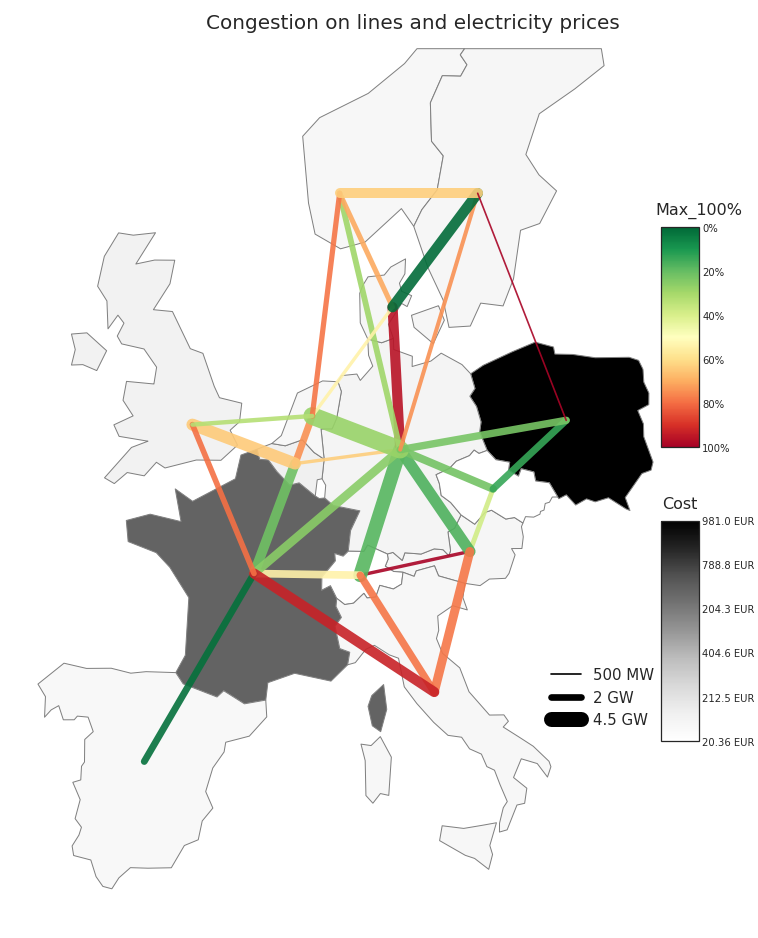

In [146]:
# plotting
polygon = Polygon([(-25,35), (40,35), (40,65),(-25,65)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
scale_factor = 300
gdf = gpd.clip(gdf, polygon)
with plt.style.context(("seaborn-white")):
    # Plot countries
    gdf.plot('value', figsize=(13,17), edgecolor="grey")
    
    reversed_color_map = plt.cm.get_cmap('RdYlGn').reversed()
    ## Loop throughthe NTC data
    # for from_coordinates, to_coordinates, ntc in zip(ntcs['from_coordinates'], ntcs['to_coordinates'], ntcs['ntc']):
    for n in range(len(new_df)):
        plt.plot([new_df.loc[n,'from_coordinates'].x , new_df.loc[n,'to_coordinates'].x] 
                , [new_df.loc[n,'from_coordinates'].y, new_df.loc[n,'to_coordinates'].y], 
                linewidth= new_df.loc[n,'ntc_max']/scale_factor, color= cm.RdYlGn(1-new_df.loc[n,'100%_utlis_oneWay_max']), alpha=0.9 )
    plt.title("Congestion on lines and electricity prices", fontsize=20, y=0.97, x=0.6)

    plt.box(False)
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

    cax1 = plt.axes([0.85, 0.52, 0.04, 0.18])
    cax2 = plt.axes([0.85, 0.28, 0.04, 0.18])
    
    clb1 = plt.colorbar(cm.ScalarMappable(norm=None, cmap="RdYlGn"), cax=cax1)
    clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
    clb1.ax.set_title('Max_100%',fontsize=16, y=1.03, x=1)

    clb2 = plt.colorbar(cm.ScalarMappable(norm=None, cmap=None), cax=cax2)
    clb2.ax.set_yticklabels([
    str(round(min(gdf['value']), 2))+' EUR',
    str(round(max(gdf['value'])*0.2 + min(gdf['value'])*0.8, 1))+' EUR',
    str(round(max(gdf['value'])*0.4 + min(gdf['value'])*0.6, 1))+' EUR',
    str(round(max(gdf['value'])*0.2 + min(gdf['value'])*0.4, 1))+' EUR',
    str(round(max(gdf['value'])*0.8+min(gdf['value'])*0.2, 1)) +' EUR',
    str(round(max(gdf['value']),1)) +' EUR',
    ])
    clb2.ax.set_title('Cost',fontsize=16, y=1.03)

    line1, = plt.plot(0, 1, linewidth=(500/scale_factor), color='black')
    line2, = plt.plot(0, 1, linewidth=(2000/scale_factor), color='black')
    line3, = plt.plot(0, 1, linewidth=(4500/scale_factor), color='black')
    plt.legend([line1, line2, line3], 
                ['500 MW', '2 GW', '4.5 GW'],
                loc='lower right', bbox_to_anchor=(0.01, 0, 0.15, 0.1),
                prop={'size': 15}
                )
    path = r"C:\Users\User\Documents\GitHub\EWMOD\Term-Paper\Maps_results/" 
    plt.savefig(path)

[True, ['uran'], 1, 1.0, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.0, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.0, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.0, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.0, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.0, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.0, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.0, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.0, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.0, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.0, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.0, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 0.8, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 0.8, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 0.8, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 0.8, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 0.8, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 0.8, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 0.8, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 0.8, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 0.8, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\anaconda3\envs\Test2_geopandas\lib\site-packages\geopandas\plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only

[True, ['uran'], 1, 0.8, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 0.8, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 0.8, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.2, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.2, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.2, 0.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.2, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.2, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.2, 0.5]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.2, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.2, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.2, 1.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran'], 1, 1.2, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite'], 1, 1.2, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


[True, ['uran', 'lignite', 'hard coal'], 1, 1.2, 3.0]


C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centeroid'] = gdf.centroid
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
C:\Users\User\AppData\Local\Temp/ipykernel_17596/1548068254.py:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  clb2.ax.set_yticklabels([


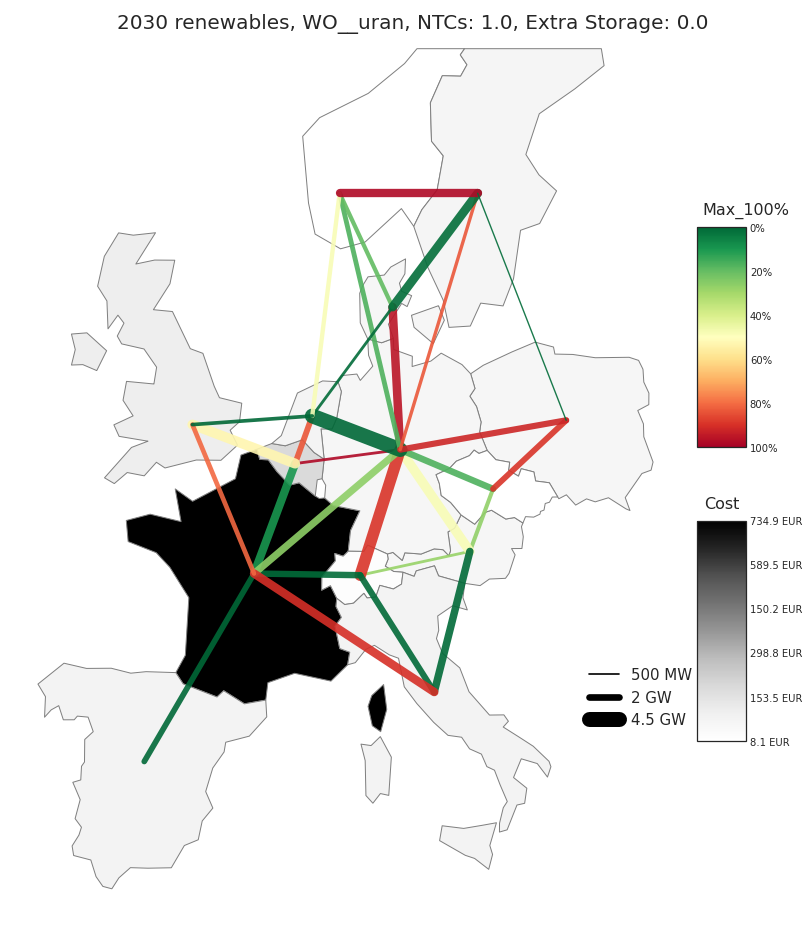

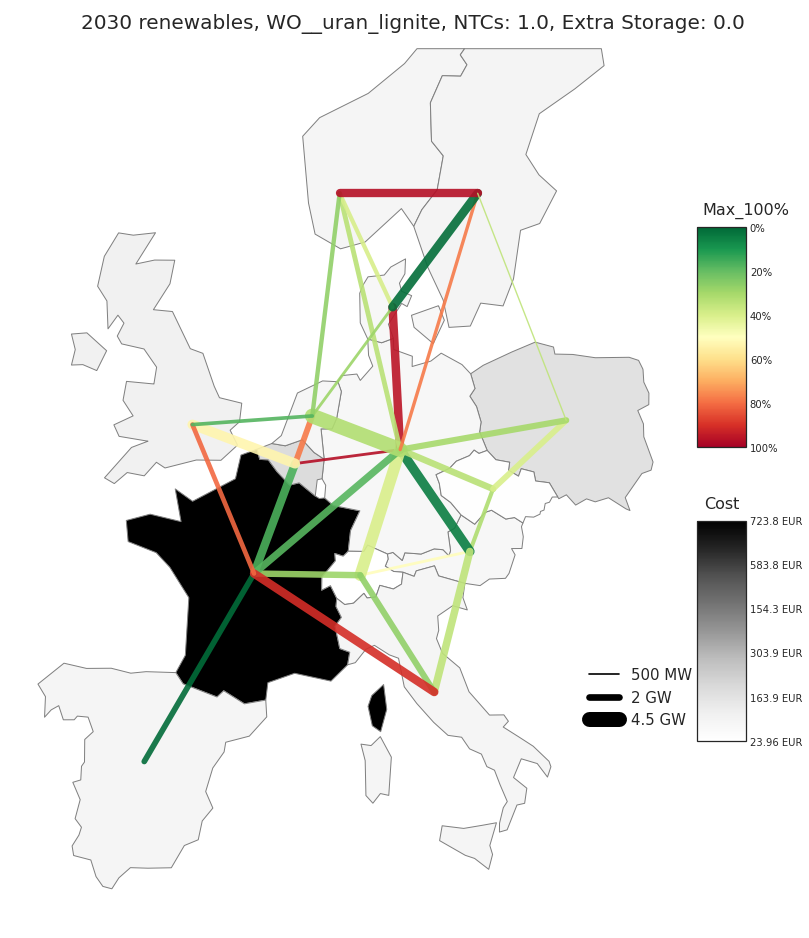

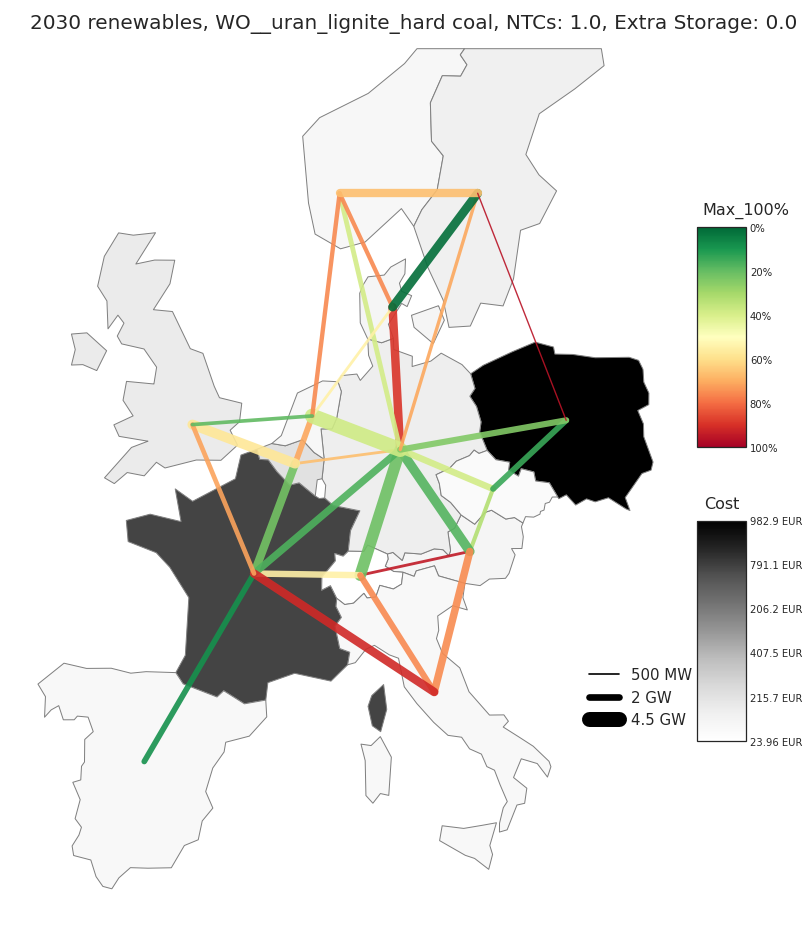

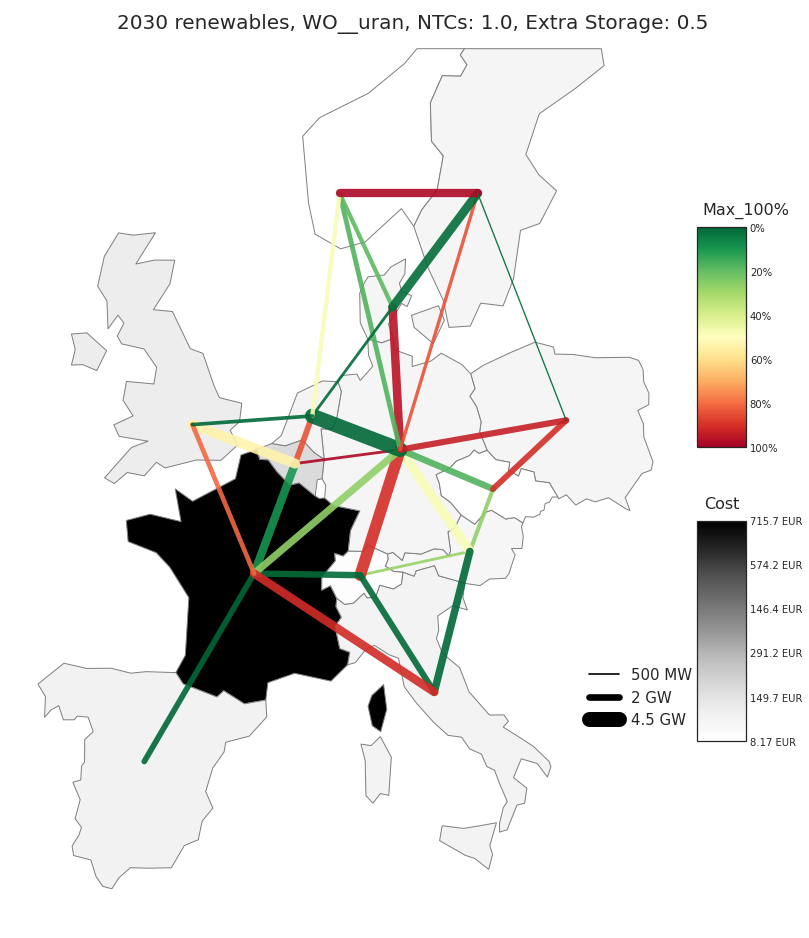

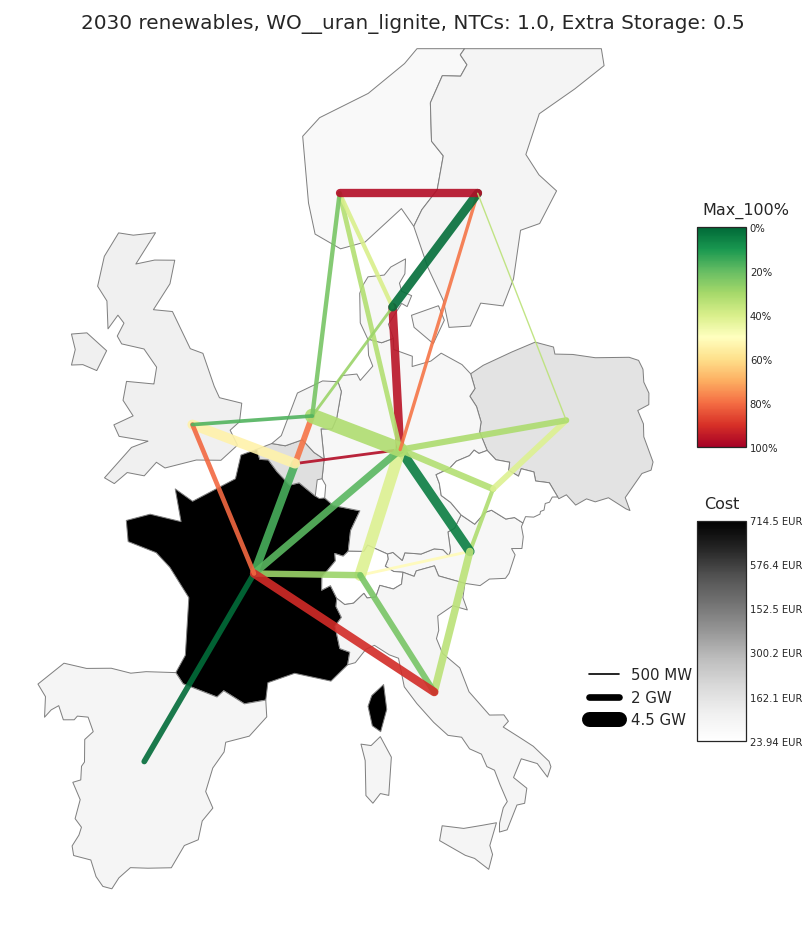

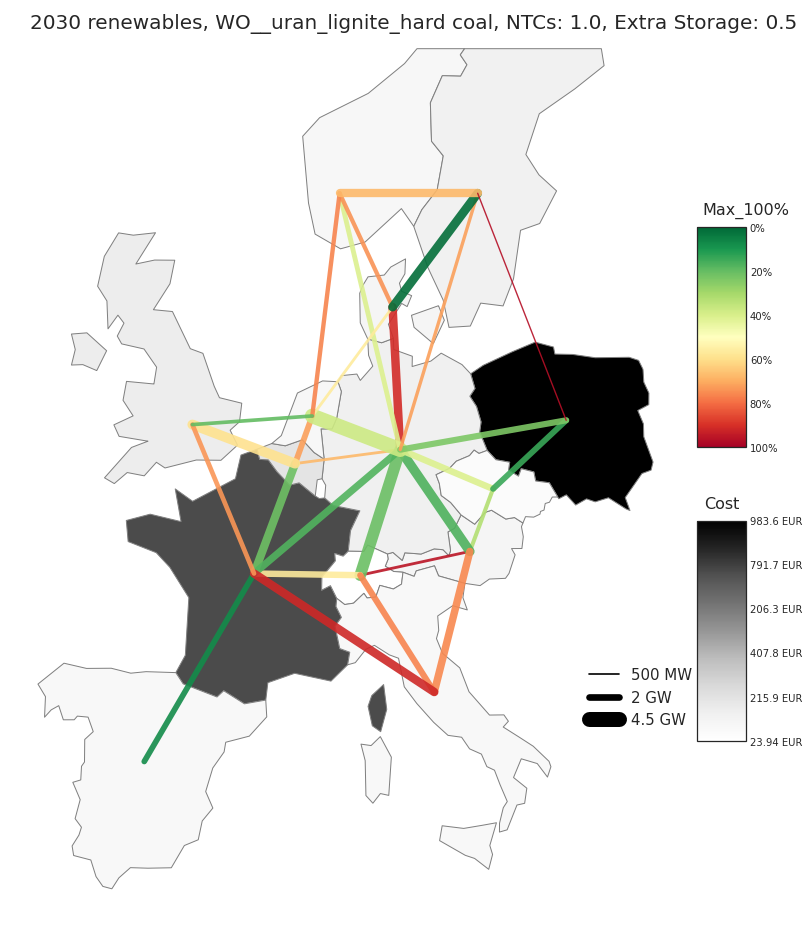

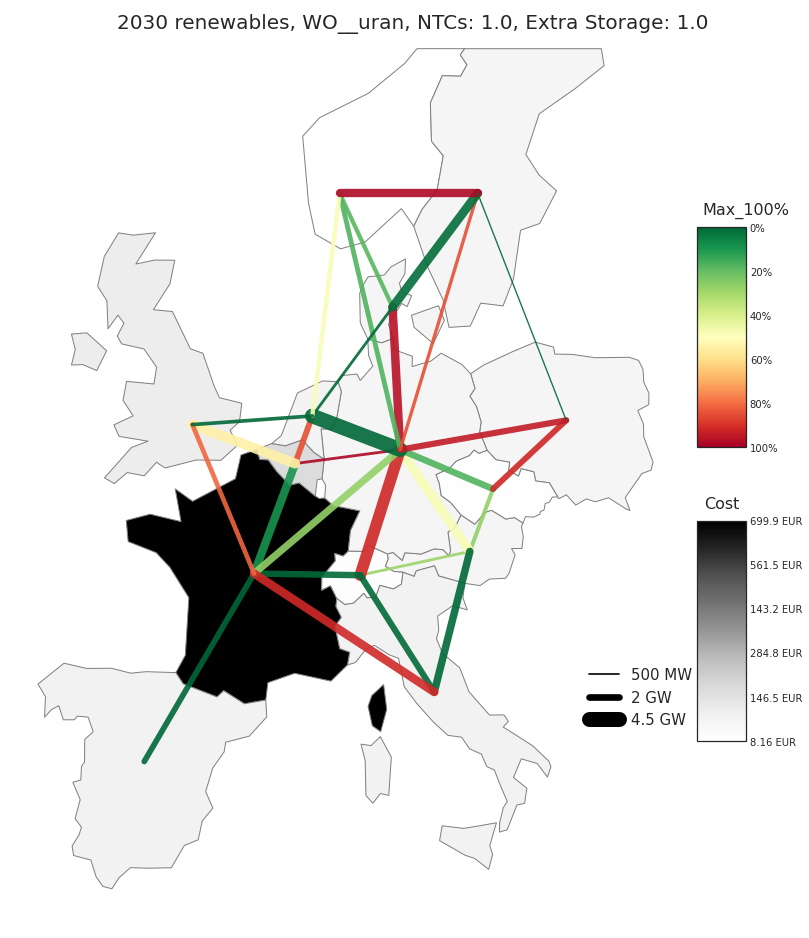

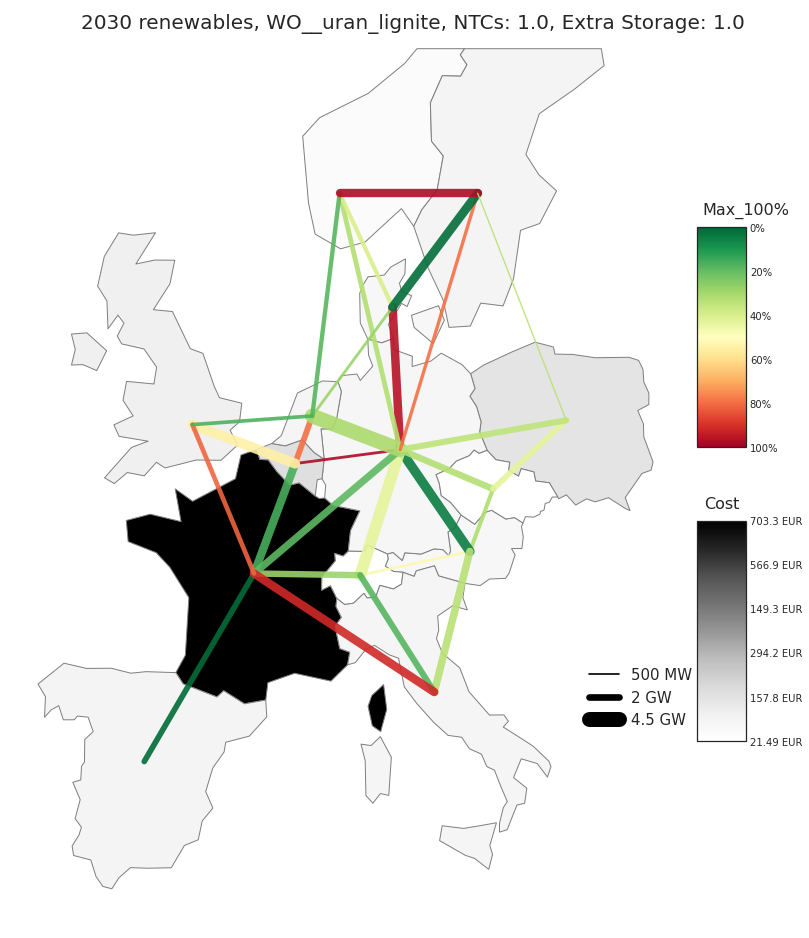

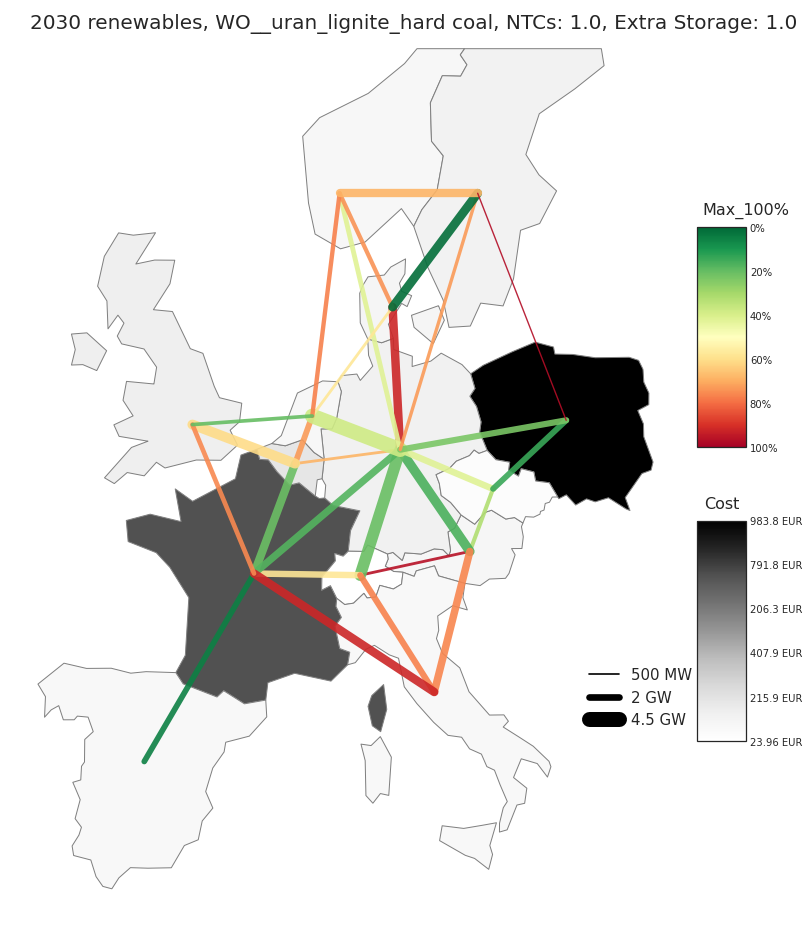

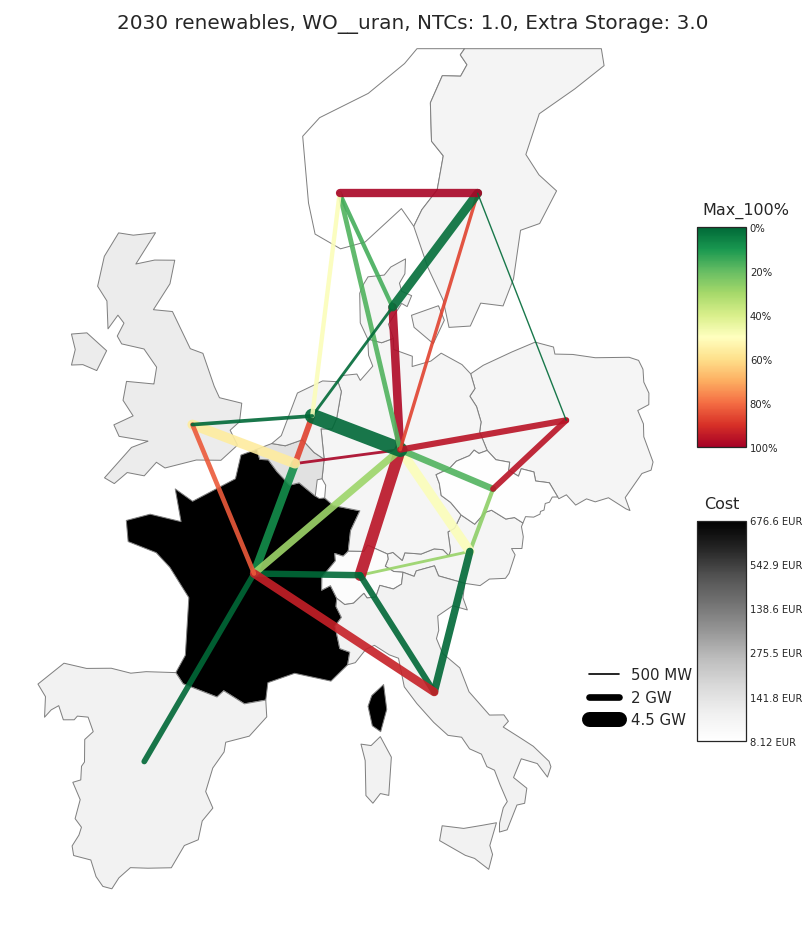

In [158]:
path = r"C:\Users\User\Documents\GitHub\EWMOD\Term-Paper\Maps_results/" 
save_type = "png"
Time_steps = 1
scenario_list = [[False, [], 1, 0, Time_steps], #1
                [True, [], 1, 0, Time_steps], #2
                [True, ["uran"], 1 ,0, Time_steps], #3
                [True, ["uran", "lignite"], 1, 0, Time_steps], #4
                [True, ["uran", "lignite", "hard coal"], 1, 0, Time_steps], #5
                ]
# itterating scenario results and plotting maps
for ntc_fac in [1.0,0.8,1.2]:
        for sto_fac in [0.0,0.5,1.0,3.0]:
            for scen in scenario_list[2:]:
                scen[3] = ntc_fac
                scen[4] = sto_fac
                print(scen)
                remove_str = "WO_"
                for x in scen[1]:
                    remove_str = remove_str+"_"+x
                name_prices = f"{scen[0]}_{remove_str}_{ntc_fac}_{sto_fac}_res_mc_grouped_by_zone_year_max.csv"
                name_ntcs = f"{scen[0]}_{remove_str}_{ntc_fac}_{sto_fac}_FromTo_ntc_utilisation.csv"
                name_plot = f"{scen[0]}_{remove_str}_{ntc_fac}_{sto_fac}_Map.{save_type}"
                name_title = f'2030 renewables, {remove_str}, NTCs: {ntc_fac}, Extra Storage: {sto_fac}'
                new_df, gdf = fetch_map_info(name_ntcs,name_prices)
                plot = plot_map(new_df, gdf, name_title)
                plot_path = path+ name_plot
                plot.savefig(path+name_plot)



In [156]:
def fetch_map_info(name_ntcs,name_prices):
    country_dict = pd.read_csv('data/Map/country_codes.csv').set_index('Code').to_dict()

    ntc_df = pd.read_csv(f'data/Map/{name_ntcs}')
    ntc_df = ntc_df.loc[~(ntc_df.ntc_max == 0)].reset_index(drop=True)
    ntc_df['from_zone'] = [country_dict['Name'][x] for x in ntc_df['from_zone']]
    ntc_df['to_zone'] = [country_dict['Name'][x] for x in ntc_df['to_zone']]


    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    countries = ntc_df.from_zone.unique()
    price_data = pd.read_csv(f'data/Map/{name_prices}').set_index('zone').drop('mc_el_maximum_std', axis=1)
    price_dict = price_data.T.to_dict('index')
    price_dict = {country_dict['Name'][key]: value for key, value in price_dict['mc_el_maximum_mean'].items()}
    gdf = world.loc[world['name'].isin(countries),:].copy()
    gdf['value'] = gdf['name'].map(price_dict)

    gdf['centeroid'] = gdf.centroid
    # correcting centeroids that seem off
    gdf.loc[gdf['name'] == 'France', 'centeroid'] = Point(2.35, 46.85)
    gdf.loc[gdf['name'] == 'Norway', 'centeroid'] = Point(7.00, 60.00)
    gdf.loc[gdf['name'] == 'Sweden', 'centeroid'] = Point(14.50, 60.00)
    gdf.loc[gdf['name'] == 'United Kingdom', 'centeroid'] = Point(-1, 52.00)

    ntc_df['from_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in ntc_df['from_zone']]
    ntc_df['to_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in ntc_df['to_zone']]

    # combining from and to values
    coun_pairs = [set([ntc_df.loc[x,'from_zone'],ntc_df.loc[x,'to_zone']]) for x in range(len(ntc_df))]
    coun_pairs = list(coun_pairs)
    revers = list(reversed(coun_pairs))
    lis = []
    for x in coun_pairs:
        lis.append([coun_pairs.index(x),revers.index(x)])


    new_df = pd.DataFrame(columns=ntc_df.columns)
    row = 0
    for x in lis:
            new_df.loc[row, 'from_zone'] = ntc_df.loc[x[0],'from_zone']
            new_df.loc[row, 'to_zone'] = ntc_df.loc[x[0],'to_zone']
            new_df.loc[row, 'ntc_max'] = (ntc_df.loc[x[0],'ntc_max'] + ntc_df.loc[x[1],'ntc_max'])/2
            new_df.loc[row, '100%_utlis_oneWay_max'] = max(ntc_df.loc[x[0],'utilisation_equal100'], ntc_df.loc[x[1],'utilisation_equal100'])
            row += 1

    new_df = new_df.drop_duplicates().reset_index(drop=True)

    new_df['from_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in new_df['from_zone']]
    new_df['to_coordinates'] = [gdf.loc[gdf['name']== x, 'centeroid'] for x in new_df['to_zone']]
    return new_df, gdf

    # plotting
def plot_map(new_df, gdf, name_title):
    polygon = Polygon([(-25,35), (40,35), (40,65),(-25,65)])
    # poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
    scale_factor = 300
    gdf = gpd.clip(gdf, polygon)
    with plt.style.context(("seaborn-white")):
        # Plot countries
        gdf.plot('value', figsize=(17,17), edgecolor="grey")
        
        reversed_color_map = plt.cm.get_cmap('RdYlGn').reversed()
        ## Loop throughthe NTC data
        for n in range(len(new_df)):
            plt.plot([new_df.loc[n,'from_coordinates'].x , new_df.loc[n,'to_coordinates'].x] 
                    , [new_df.loc[n,'from_coordinates'].y, new_df.loc[n,'to_coordinates'].y], 
                    linewidth= new_df.loc[n,'ntc_max']/scale_factor, color= cm.RdYlGn(1-new_df.loc[n,'100%_utlis_oneWay_max']), alpha=0.9 )
        plt.title(name_title, fontsize=20, y=0.97, x=0.6)

        plt.box(False)
        plt.tick_params(left = False, right = False , labelleft = False ,
                        labelbottom = False, bottom = False)

        cax1 = plt.axes([0.8, 0.52, 0.04, 0.18])
        cax2 = plt.axes([0.8, 0.28, 0.04, 0.18])
        
        clb1 = plt.colorbar(cm.ScalarMappable(norm=None, cmap="RdYlGn"), cax=cax1)
        clb1.ax.set_yticklabels(['100%','80%','60%','40%','20%','0%'])
        clb1.ax.set_title('Max_100%',fontsize=16, y=1.03, x=1)

        clb2 = plt.colorbar(cm.ScalarMappable(norm=None, cmap=None), cax=cax2)
        clb2.ax.set_yticklabels([
        str(round(min(gdf['value']), 2))+' EUR',
        str(round(max(gdf['value'])*0.2 + min(gdf['value'])*0.8, 1))+' EUR',
        str(round(max(gdf['value'])*0.4 + min(gdf['value'])*0.6, 1))+' EUR',
        str(round(max(gdf['value'])*0.2 + min(gdf['value'])*0.4, 1))+' EUR',
        str(round(max(gdf['value'])*0.8 + min(gdf['value'])*0.2, 1)) +' EUR',
        str(round(max(gdf['value']),1)) +' EUR',
        ])
        clb2.ax.set_title('Cost',fontsize=16, y=1.03)

        line1, = plt.plot(0, 1, linewidth=(500/scale_factor), color='black')
        line2, = plt.plot(0, 1, linewidth=(2000/scale_factor), color='black')
        line3, = plt.plot(0, 1, linewidth=(4500/scale_factor), color='black')
        plt.legend([line1, line2, line3], 
                    ['500 MW', '2 GW', '4.5 GW'],
                    loc='lower right', bbox_to_anchor=(0.01, 0, 0.15, 0.1),
                    prop={'size': 15}
                    )
        return plt